In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('linear_data.csv')
df.head()
                 

,x,y
0,0.00000,4.447692
1,0.02004,5.024612
2,0.04008,5.869593
3,0.06012,4.722490
4,0.08016,4.877101


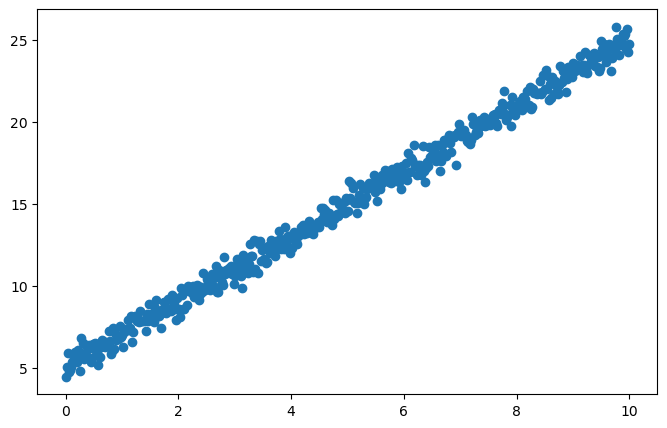

In [3]:
plt.figure(figsize=(8,5))
plt.scatter(df[['x']],df['y'])


In [4]:
df.corr()

,x,y
x,1.00000,0.99644
y,0.99644,1.00000


In [5]:
df1 = pd.read_csv('nonlinear_data.csv')
df1.head()

,x,y
0,0.00000,-0.155043
1,0.02004,0.081809
2,0.04008,-0.014298
3,0.06012,0.143978
4,0.08016,0.019553


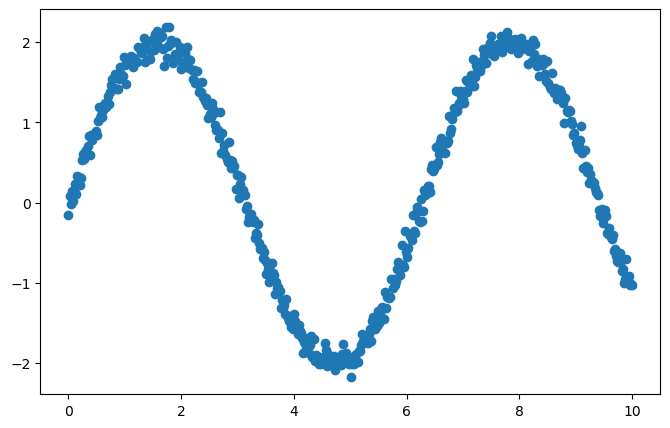

In [6]:
plt.figure(figsize=(8,5))
plt.scatter(df1[['x']],df1['y'])

In [7]:
df1.corr()

,x,y
x,1.000000,-0.065736
y,-0.065736,1.000000


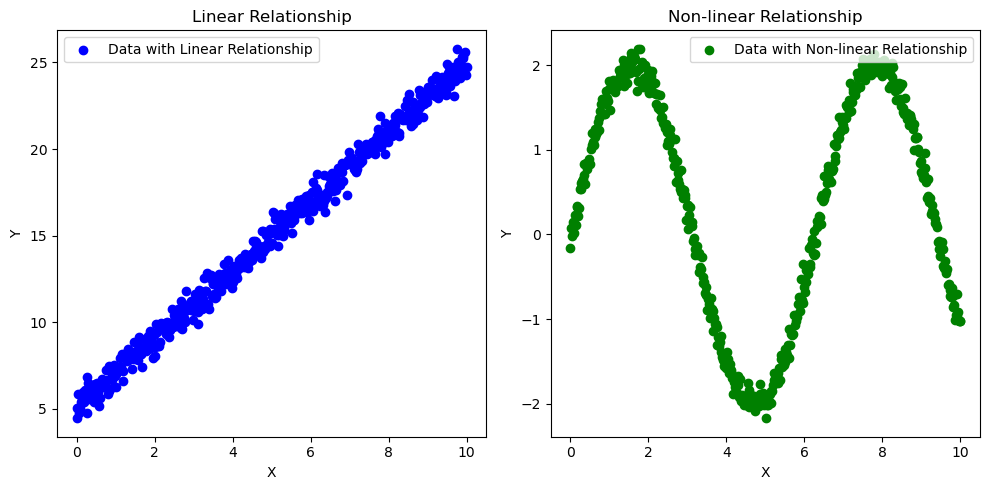

In [8]:
#linear
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)

plt.scatter(df.x, df.y, color='blue', label='Data with Linear Relationship')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Linear Relationship')
plt.legend()

#non-linear
plt.subplot(1, 2, 2)
plt.scatter(df1.x, df1.y, color='green', label='Data with Non-linear Relationship')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Non-linear Relationship')
plt.legend()

plt.tight_layout() #adjusts the subplots to fit into the figure area properly
plt.show()

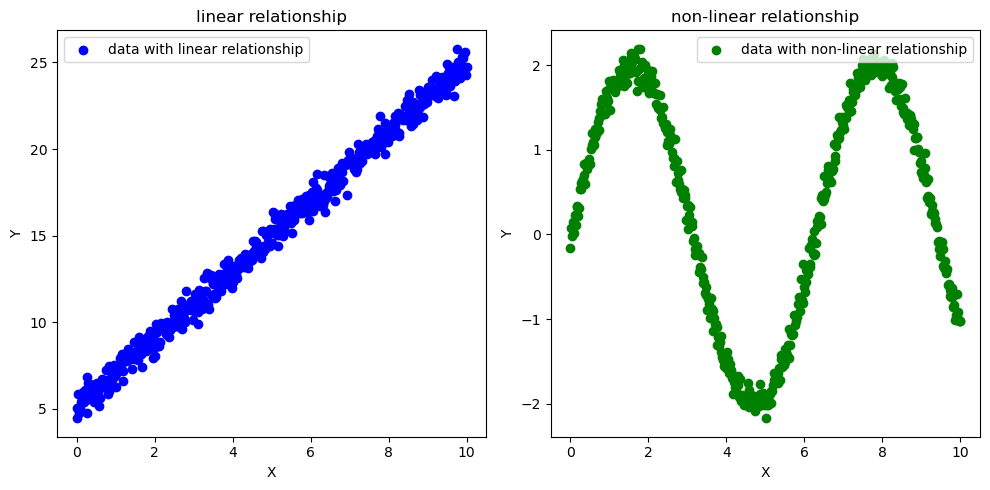

In [9]:
#linear
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
# the figure has 1 row, 2 columns, and this plot is the first plot.
plt.scatter(df.x,df.y ,color = 'blue',label ='data with linear relationship')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('linear relationship')
plt.legend()
# legend -- all labels are shown in left side

#non_linear 
plt.subplot(1,2,2)
# the figure has 1 row, 2 columns, and this plot is the 2nd plot.
plt.scatter(df1.x,df1.y ,color = 'green',label ='data with non-linear relationship')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('non-linear relationship')
plt.legend()

plt.tight_layout()
plt.show()


# Correlation coefficients

In [10]:
# Correlation coefficients using Numpy (previously we did it by Pandas)
correlation_linear = np.corrcoef(df.x,df.y)
print("Correlation coefficient for linear relationship:", correlation_linear)

Correlation coefficient for linear relationship: [[1.         0.99643985]
 [0.99643985 1.        ]]


In [11]:
df.corr()
# correlation ---it is preferable (using pandas)

,x,y
x,1.00000,0.99644
y,0.99644,1.00000


In [12]:
correlation_nonlinear = np.corrcoef(df1.x,df1.y)
print("Correlation coefficient for non-linear relationship:", correlation_nonlinear)

Correlation coefficient for non-linear relationship: [[ 1.         -0.06573583]
 [-0.06573583  1.        ]]


In [13]:
df1.corr()
# correlation ---it is preferable (using pandas)

,x,y
x,1.000000,-0.065736
y,-0.065736,1.000000


# linear regression

In [14]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg

LinearRegression()

In [15]:
reg.fit(df[['x']],df[['y']])

LinearRegression()

In [16]:
reg.score(df[['x']],df['y']) 
#testing score

0.9928923730526016

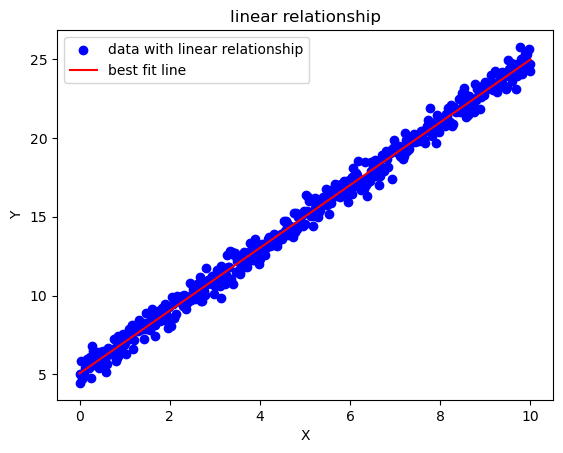

In [17]:
plt.scatter(df[['x']],df['y'], color='blue', label ='data with linear relationship')
plt.plot(df[['x']],reg.predict(df[['x']]), color ='red', label ='best fit line')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('linear relationship')
plt.legend()

# Non-linear

In [18]:
df1.corr()
# negative correlation

,x,y
x,1.000000,-0.065736
y,-0.065736,1.000000


In [19]:
from sklearn.linear_model import LinearRegression
reg1 = LinearRegression()
reg1

LinearRegression()

In [20]:
reg1.fit(df1[['x']],df1[['y']])

LinearRegression()

In [21]:
reg1.score(df1[['x']],df1[['y']])

0.004321199719043767

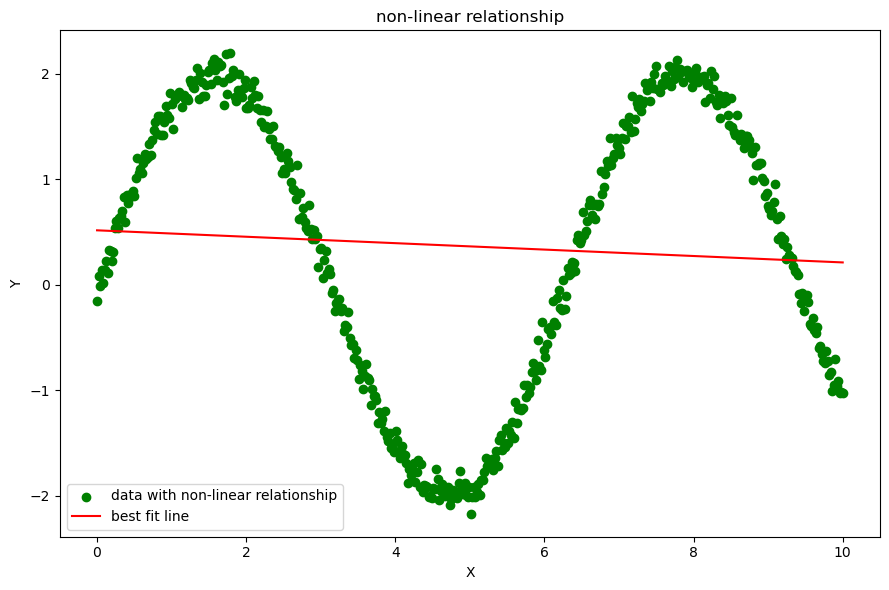

In [22]:
plt.figure(figsize=(9,6))
plt.scatter(df1[['x']],df1['y'],color='green', label ='data with non-linear relationship')

plt.plot(df1[['x']],reg1.predict(df1[['x']]),color ='red', label = 'best fit line')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('non-linear relationship')
plt.legend()
plt.tight_layout()
plt.show()

# polynomial regression

In [23]:
df1.head()

,x,y
0,0.00000,-0.155043
1,0.02004,0.081809
2,0.04008,-0.014298
3,0.06012,0.143978
4,0.08016,0.019553


In [24]:
from sklearn.preprocessing import PolynomialFeatures

In [25]:
poly = PolynomialFeatures(degree=5)
x_poly = poly.fit_transform(df1[['x']])

In [26]:
x_poly.shape

(500, 6)

In [27]:
pd.DataFrame(x_poly)
# tables are created by math eq but not discuss here

,0,1,2,3,4,5
0,1.0,0.00000,0.000000,0.000000,0.000000e+00,0.000000e+00
1,1.0,0.02004,0.000402,0.000008,1.612864e-07,3.232193e-09
2,1.0,0.04008,0.001606,0.000064,2.580583e-06,1.034302e-07
3,1.0,0.06012,0.003614,0.000217,1.306420e-05,7.854229e-07
4,1.0,0.08016,0.006426,0.000515,4.128932e-05,3.309766e-06
...,...,...,...,...,...,...
495,1.0,9.91984,98.403219,976.144159,9.683194e+03,9.605573e+04
496,1.0,9.93988,98.801210,982.072144,9.761679e+03,9.702992e+04
497,1.0,9.95992,99.200003,988.024080,9.840641e+03,9.801199e+04
498,1.0,9.97996,99.599600,994.000016,9.920080e+03,9.900200e+04


In [28]:
df1.x.head()

0    0.00000
1    0.02004
2    0.04008
3    0.06012
4    0.08016
Name: x, dtype: float64

In [29]:
reg_poly = LinearRegression()

In [30]:
reg_poly.fit(x_poly,df1['y'])

LinearRegression()

In [31]:
reg_poly.score(x_poly,df1['y'])

0.9301853282900976

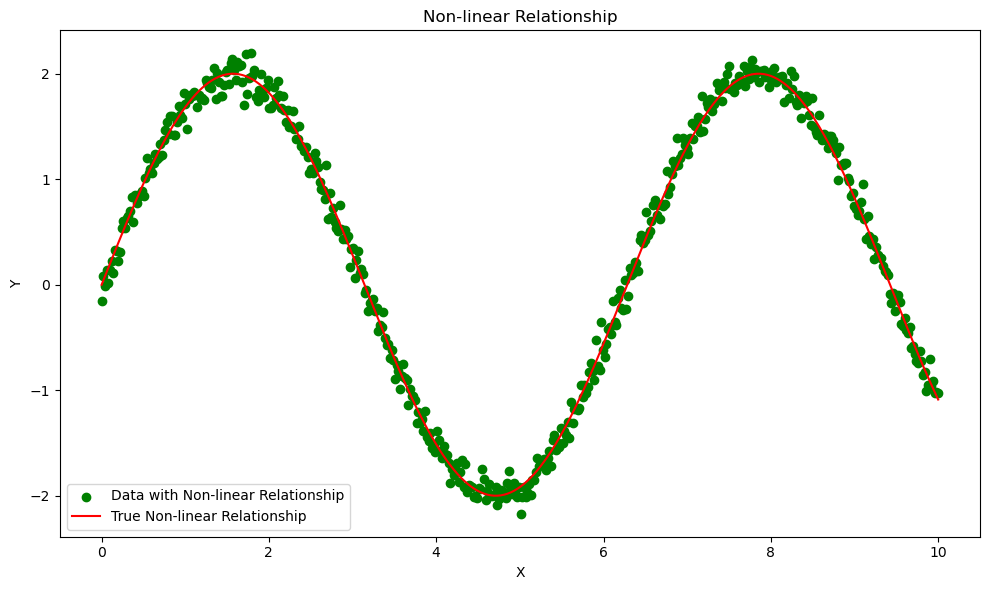

In [32]:
plt.figure(figsize = (10,6))
plt.scatter(df1.x, df1.y, color='green', label='Data with Non-linear Relationship')
plt.plot(df1.x,2*np.sin(df1.x),color ='red',label ='True Non-linear Relationship')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Non-linear Relationship')

plt.legend()
plt.tight_layout()
plt.show()

# Testing Overfit or Bestfit

In [34]:
from sklearn.model_selection import train_test_split

In [36]:
xtrain,xtest,ytrain,ytest = train_test_split(x_poly,df1.y,test_size = 0.25,random_state =42)

In [37]:
xtrain.shape

(375, 6)

In [40]:
pd.DataFrame(xtrain)

,0,1,2,3,4,5
0,1.0,4.549098,20.694294,94.140377,428.253821,1948.168683
1,1.0,8.356713,69.834659,583.588235,4876.879639,40754.685563
2,1.0,4.068136,16.549733,67.326568,273.893654,1114.236707
3,1.0,2.525050,6.375878,16.099411,40.651820,102.647883
4,1.0,6.593186,43.470107,286.606514,1889.650163,12458.815705
...,...,...,...,...,...,...
370,1.0,2.124248,4.512432,9.585526,20.362040,43.254032
371,1.0,5.410822,29.276991,158.412576,857.142194,4637.843532
372,1.0,6.973948,48.635949,339.184576,2365.455560,16496.563824
373,1.0,8.717435,75.993671,662.469875,5775.037988,50343.517528


In [42]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       500 non-null    float64
 1   y       500 non-null    float64
dtypes: float64(2)
memory usage: 7.9 KB


In [44]:
reg_poly.fit(xtrain,ytrain)

LinearRegression()

In [45]:
reg_poly.score(xtrain,ytrain)

0.9318793572827131

In [47]:
reg_poly.score(xtest,ytest)

0.9205445246284961